In [1]:
import pandas as pd
from textblob import TextBlob
import csv
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
import os
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

In [3]:
n = 4300
t = 'Ulysses'
s = 2

In [4]:
novel = strip_headers(load_etext(n))
novel = novel.replace('\n', ' ')
novel= TextBlob(novel)
novel_sentences = novel.sentences
novel_title = t

In [5]:
for l in range(2):
    novelWriter = csv.writer(open('novel_'+novel_title+'3.csv', 'w'), delimiter=',')
    for sentence in novel_sentences:
        novelWriter.writerow([sentence])

In [5]:
df_novel = pd.read_csv('novel_'+novel_title+'3.csv', skiprows = s, header=None)

In [6]:
df_novel.head()

,0
0,He held the bowl aloft and intoned: --_Introi...
1,"Halted, he peered down the dark winding stairs..."
2,"Come up, you fearful jesuit!"
3,Solemnly he came forward and mounted the round...
4,He faced about and blessed gravely thrice the ...


In [7]:
len(df_novel)

22724

In [8]:
wrd_length = []
total_char = []
def wrd_char_counts(sentence):
    total_chars = 0
    wrd_counts = []
    for word in sentence:
        char_count = len(word)
        wrd_counts.append(char_count)
        total_chars += char_count
    total_char.append(total_chars)
    wrd_length.append(wrd_counts)

In [9]:
for l in df_novel[0]:
    sent = TextBlob(l)
    wrd_char_counts(sent.words)

In [10]:
df_novel['wrd_length'] = wrd_length
df_novel['total_char'] = total_char

In [11]:
df_novel.head()

,0,wrd_length,total_char
0,He held the bowl aloft and intoned: --_Introi...,"[2, 4, 3, 4, 5, 3, 7, 8, 2, 6, 3]",47
1,"Halted, he peered down the dark winding stairs...","[6, 2, 6, 4, 3, 4, 7, 6, 3, 6, 3, 8, 4, 2, 5]",69
2,"Come up, you fearful jesuit!","[4, 2, 3, 7, 6]",22
3,Solemnly he came forward and mounted the round...,"[8, 2, 4, 7, 3, 7, 3, 5, 7]",46
4,He faced about and blessed gravely thrice the ...,"[2, 5, 5, 3, 7, 7, 6, 3, 5, 3, 11, 4, 3, 3, 7, 9]",83


In [12]:
def CountSyllables(word, isName=True):
    vowels = "aeiouy"
    #single syllables in words like bread and lead, but split in names like Breanne and Adreann
    specials = ["ia","ea"] if isName else ["ia"]
    specials_except_end = ["ie","ya","es","ed"]  #seperate syllables unless ending the word
    currentWord = word.lower()
    numVowels = 0
    lastWasVowel = False
    last_letter = ""

    for letter in currentWord:
        if letter in vowels:
            #don't count diphthongs unless special cases
            combo = last_letter+letter
            if lastWasVowel and combo not in specials and combo not in specials_except_end:
                lastWasVowel = True
            else:
                numVowels += 1
                lastWasVowel = True
        else:
            lastWasVowel = False

        last_letter = letter

    #remove es & ed which are usually silent
    if len(currentWord) > 2 and currentWord[-2:] in specials_except_end:
        numVowels -= 1

    #remove silent single e, but not ee since it counted it before and we should be correct
    elif len(currentWord) > 2 and currentWord[-1:] == "e" and currentWord[-2:] != "ee" and currentWord != 'the':
        numVowels -= 1

    return numVowels

In [13]:
syl = []
for l in df_novel[0]:
    sent = TextBlob(l)
    syl_single = []
    for x in sent.words:
        m = CountSyllables(x)
        syl_single.append(m)
    syl.append(syl_single) 

In [14]:
syl_count_arr = []
for n in syl:
    n = np.array(n)
    syl_count_arr.append(n)

In [15]:
df_novel['syl_count'] = syl_count_arr

In [21]:
df_novel.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment
0,He held the bowl aloft and intoned: --_Introi...,"[2, 4, 3, 4, 5, 3, 7, 8, 2, 6, 3]",47,"[1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1]",16,0.000000
1,"Halted, he peered down the dark winding stairs...","[6, 2, 6, 4, 3, 4, 7, 6, 3, 6, 3, 8, 4, 2, 5]",69,"[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1]",18,-0.101852
2,"Come up, you fearful jesuit!","[4, 2, 3, 7, 6]",22,"[1, 1, 1, 3, 2]",8,-1.000000
3,Solemnly he came forward and mounted the round...,"[8, 2, 4, 7, 3, 7, 3, 5, 7]",46,"[3, 1, 1, 2, 1, 1, 1, 1, 2]",13,-0.200000
4,He faced about and blessed gravely thrice the ...,"[2, 5, 5, 3, 7, 7, 6, 3, 5, 3, 11, 4, 3, 3, 7, 9]",83,"[1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2]",25,0.000000


In [17]:
syl_sum = []
for l in range(0,len(df_novel)):
    syl_sum.append(df_novel['syl_count'][l].sum())

In [18]:
df_novel['syl_sum'] = syl_sum

In [19]:
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity

In [20]:
df_novel['sentiment'] = df_novel[0].apply(detect_sentiment)

In [23]:
df_novel.to_csv('novel_'+novel_title+'3_2.csv', index=False)

In [24]:
#test
df_test = pd.read_csv('novel_'+novel_title+'3_2.csv')

In [25]:
df_test.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment
0,He held the bowl aloft and intoned: --_Introi...,"[2, 4, 3, 4, 5, 3, 7, 8, 2, 6, 3]",47,[1 1 1 1 2 1 2 3 1 2 1],16,0.000000
1,"Halted, he peered down the dark winding stairs...","[6, 2, 6, 4, 3, 4, 7, 6, 3, 6, 3, 8, 4, 2, 5]",69,[1 1 1 1 1 1 2 1 1 1 1 3 1 1 1],18,-0.101852
2,"Come up, you fearful jesuit!","[4, 2, 3, 7, 6]",22,[1 1 1 3 2],8,-1.000000
3,Solemnly he came forward and mounted the round...,"[8, 2, 4, 7, 3, 7, 3, 5, 7]",46,[3 1 1 2 1 1 1 1 2],13,-0.200000
4,He faced about and blessed gravely thrice the ...,"[2, 5, 5, 3, 7, 7, 6, 3, 5, 3, 11, 4, 3, 3, 7, 9]",83,[1 1 2 1 1 3 1 1 2 1 3 1 1 1 3 2],25,0.000000


In [23]:
df2 = df_novel[df_novel['total_char']<=3]
df2

,0,wrd_length,total_char,syl_count,syl_sum,sentiment
75,--God!,[3],3,[1],1,0.0
211,Why?,[3],3,[1],1,0.0
216,--Yes?,[3],3,[0],0,0.0
232,Why?,[3],3,[1],1,0.0
627,All.,[3],3,[1],1,0.0
656,_Zut!,[3],3,[1],1,0.0
691,--Yes.,[3],3,[0],0,0.0
704,--Yes.,[3],3,[0],0,0.0
788,Yes.,[3],3,[0],0,0.0
790,All.,[3],3,[1],1,0.0


In [30]:
df_cluster = df_novel.drop('wrd_length', 1)

In [31]:
df_cluster = df_cluster.drop('syl_count', 1)

In [32]:
df_cluster.head()

,0,total_char,syl_sum,sentiment
0,He held the bowl aloft and intoned: --_Introi...,47,16,0.000000
1,"Halted, he peered down the dark winding stairs...",69,18,-0.101852
2,"Come up, you fearful jesuit!",22,8,-1.000000
3,Solemnly he came forward and mounted the round...,46,13,-0.200000
4,He faced about and blessed gravely thrice the ...,83,25,0.000000


In [27]:
X = df_cluster.drop(0, axis=1)

In [28]:
from sklearn.cluster import KMeans

In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [92]:
km = KMeans(n_clusters=20, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [93]:
km.labels_

array([ 0, 16, 18, ...,  8,  1,  0], dtype=int32)

In [94]:
df_cluster['cluster'] = km.labels_

In [33]:
df_cluster.head()

,0,total_char,syl_sum,sentiment,cluster
0,He held the bowl aloft and intoned: --_Introi...,47,16,0.000000,0
1,"Halted, he peered down the dark winding stairs...",69,18,-0.101852,16
2,"Come up, you fearful jesuit!",22,8,-1.000000,18
3,Solemnly he came forward and mounted the round...,46,13,-0.200000,7
4,He faced about and blessed gravely thrice the ...,83,25,0.000000,12


In [118]:
df_cluster2.head()

,0,total_char,syl_sum,sentiment,cluster
0,He held the bowl aloft and intoned: --_Introi...,47,16,0.000000,17
1,"Halted, he peered down the dark winding stairs...",69,18,-0.101852,0
2,"Come up, you fearful jesuit!",22,8,-1.000000,5
3,Solemnly he came forward and mounted the round...,46,13,-0.200000,6
4,He faced about and blessed gravely thrice the ...,83,25,0.000000,16


In [104]:
df_cluster[df_cluster['cluster']==1]


,0,total_char,syl_sum,sentiment,cluster
22722,Mulveys was the first when I was in bed that m...,50694,16135,0.046562,1


In [105]:
df_cluster[df_cluster['cluster']==8]

,0,total_char,syl_sum,sentiment,cluster
22721,Yes because he never did a thing like that bef...,43798,14021,0.044773,8


In [107]:
m = df_cluster[df_cluster['total_char'] > 40000]
m

,0,total_char,syl_sum,sentiment,cluster
22721,Yes because he never did a thing like that bef...,43798,14021,0.044773,8
22722,Mulveys was the first when I was in bed that m...,50694,16135,0.046562,1


In [108]:
df_cluster2 = df_cluster[df_cluster['total_char'] < 40000]

In [95]:
df_cluster.groupby('cluster').mean()

,total_char,syl_sum,sentiment
cluster,,,
0,21.088429,6.481981,-0.000091
1,50694.000000,16135.000000,0.046562
2,48.147135,15.125000,0.535218
3,36.530769,11.461538,-0.745275
4,57.941075,18.062392,-0.347128
5,53.716319,16.644213,0.241229
6,41.535211,13.112676,0.965986
7,57.479759,17.525409,-0.192138
8,43798.000000,14021.000000,0.044773


In [86]:
centers = df_cluster.groupby('cluster').mean()

In [96]:
colors = np.array(['#999999', '#0000ff', '#4d4d4d', '#0000b2', '#8833ff', '#333333', '#4412b2', '#808080', '#33a3ff', '#124cb2', '#666666', '#39b54a','#21682b', '#64c1b5', '#2b6855', '#91c164', '#40682b', '#3fa9f5', '#7cc3f5','#badcf5',])

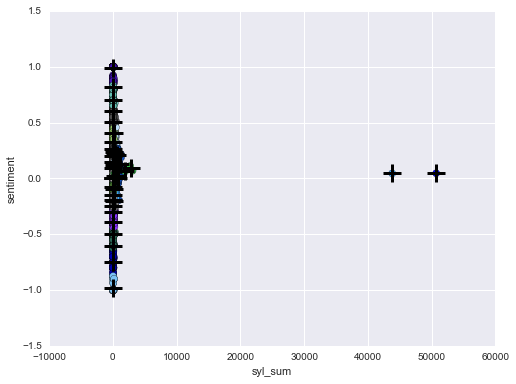

In [98]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df_cluster.total_char, df_cluster.sentiment, c=colors[df_cluster.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.total_char, centers.sentiment, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('syl_sum')
plt.ylabel('sentiment')

In [109]:
X = df_cluster2.drop(0, axis=1)

In [110]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [111]:
km = KMeans(n_clusters=20, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=20, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [112]:
km.labels_

array([17,  0,  5, ..., 11,  1, 17], dtype=int32)

In [114]:
df_cluster2['cluster'] = km.labels_

/Users/aliciagyori/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [115]:
df_cluster2.groupby('cluster').mean()

,total_char,syl_sum,sentiment
cluster,,,
0,59.219119,18.383613,-0.033406
1,13.063422,3.959837,-0.000060
2,248.273657,79.537084,0.112126
3,996.259259,327.333333,0.079863
4,38.526627,11.956607,0.794827
5,39.861538,12.351282,-0.599877
6,33.554120,10.166397,-0.243967
7,2578.000000,852.333333,0.081097
8,618.676923,200.384615,0.101489


In [120]:
centers = df_cluster2.groupby('cluster').mean()

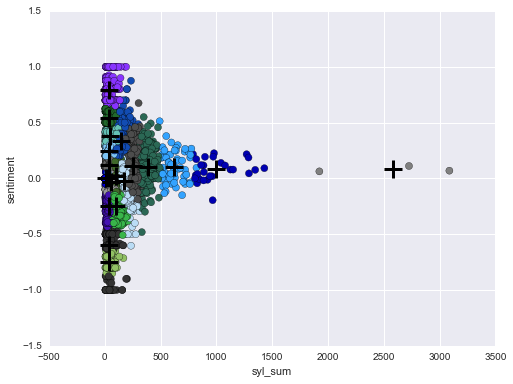

In [121]:
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(df_cluster2.total_char, df_cluster2.sentiment, c=colors[df_cluster2.cluster], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.total_char, centers.sentiment, linewidths=3, marker='+', s=300, c='black')

# add labels
plt.xlabel('syl_sum')
plt.ylabel('sentiment')

In [122]:
from sklearn import metrics
metrics.silhouette_score(X_scaled, km.labels_)

0.52576636868359983

In [ ]:
k_range = range(2,20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_scaled)
    scores.append(metrics.silhouette_score(X_scaled, km.labels_))

In [42]:
df_novel['total_char'].sum()

1188488

In [43]:
ratio = (df_novel['total_char'].sum()/20) - 50

In [44]:
ratio

59374

In [67]:
t = 0
x = 0
ratio = (df_novel['total_char'].sum()/20) - 2000
def find_this(t, x):
    w = 0    
    sent_stop = []
    while w <= ratio:
        w = df_novel['total_char'][t:x].sum()
        sent_stop.append(x)
        x += 1
    return max(sent_stop)  

In [68]:
t = 0
x = 0
start_point = []
stop_point = []
for n in range(1, 21):
    s = find_this(t, x)
    print "df_novel['total_char'][%s:%s]" %(t, s)
    start_point.append(t)
    stop_point.append(s)
    t = s
    x = s + 1  

df_novel['total_char'][0:1442]
df_novel['total_char'][1442:3210]
df_novel['total_char'][3210:5123]
df_novel['total_char'][5123:6747]
df_novel['total_char'][6747:8636]
df_novel['total_char'][8636:9882]
df_novel['total_char'][9882:11449]
df_novel['total_char'][11449:13271]
df_novel['total_char'][13271:14110]
df_novel['total_char'][14110:14677]
df_novel['total_char'][14677:15972]
df_novel['total_char'][15972:16627]
df_novel['total_char'][16627:18033]
df_novel['total_char'][18033:19237]
df_novel['total_char'][19237:20677]
df_novel['total_char'][20677:21425]
df_novel['total_char'][21425:21879]
df_novel['total_char'][21879:22317]
df_novel['total_char'][22317:22702]
df_novel['total_char'][22702:22723]


In [77]:
df_novel['sentiment'][0:1442].mean()

0.01988396195357015

In [74]:
start_point

[0,
 1442,
 3210,
 5123,
 6747,
 8636,
 9882,
 11449,
 13271,
 14110,
 14677,
 15972,
 16627,
 18033,
 19237,
 20677,
 21425,
 21879,
 22317,
 22702]

In [75]:
stop_point

[1442,
 3210,
 5123,
 6747,
 8636,
 9882,
 11449,
 13271,
 14110,
 14677,
 15972,
 16627,
 18033,
 19237,
 20677,
 21425,
 21879,
 22317,
 22702,
 22723]

In [76]:
twenty_piece_char

[0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015,
 0.01988396195357015]

In [78]:
twenty_piece_char = []
st = 0
for l in start_point: 
    strt = start_point[st]
    stp = stop_point[st]
    print strt
    print stp
    mn = df_novel['sentiment'][strt:stp].mean()
    twenty_piece_char.append(mn)
    print mn
    st +=1

0
1442
0.0198839619536
1442
3210
0.0232928964052
3210
5123
0.0175908302313
5123
6747
0.0181784774215
6747
8636
0.0318514820167
8636
9882
0.071734232943
9882
11449
0.0353979352415
11449
13271
0.03767915143
13271
14110
0.0280077764543
14110
14677
0.0640188821054
14677
15972
0.0176999647256
15972
16627
0.0603884312631
16627
18033
0.0176292057378
18033
19237
0.0314493138553
19237
20677
0.0129800224049
20677
21425
0.029127146747
21425
21879
0.0744381358559
21879
22317
0.0263227383539
22317
22702
0.0283683637859
22702
22723
0.0227449633445


In [79]:
n = np.array(n)
twenty_piece_char = np.array(twenty_piece_char)
print twenty_piece_char

[ 0.01988396  0.0232929   0.01759083  0.01817848  0.03185148  0.07173423
  0.03539794  0.03767915  0.02800778  0.06401888  0.01769996  0.06038843
  0.01762921  0.03144931  0.01298002  0.02912715  0.07443814  0.02632274
  0.02836836  0.02274496]


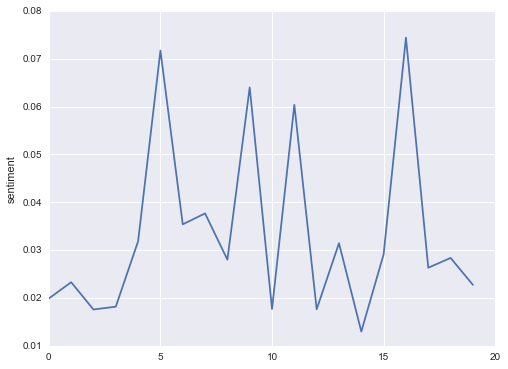

In [80]:
plt.plot(twenty_piece_char)
plt.ylabel('sentiment')
plt.show()

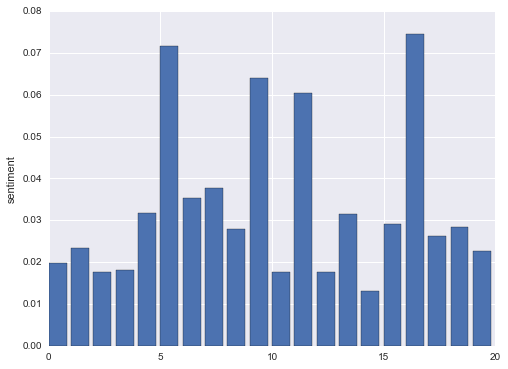

In [81]:
plt.bar(range(20), twenty_piece_char)
plt.ylabel('sentiment')
plt.show()

In [33]:
df_cluster3 = df_cluster

In [34]:
df_cluster3.head()

,0,total_char,syl_sum,sentiment
0,He held the bowl aloft and intoned: --_Introi...,47,16,0.000000
1,"Halted, he peered down the dark winding stairs...",69,18,-0.101852
2,"Come up, you fearful jesuit!",22,8,-1.000000
3,Solemnly he came forward and mounted the round...,46,13,-0.200000
4,He faced about and blessed gravely thrice the ...,83,25,0.000000


In [35]:
X = df_cluster3.drop(0, axis=1)

In [36]:
from sklearn.cluster import KMeans

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [41]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [42]:
km.labels_

array([0, 0, 0, ..., 1, 1, 0], dtype=int32)

In [43]:
df_cluster3['cluster'] = km.labels_

In [44]:
df_cluster3.groupby('cluster').mean()

,total_char,syl_sum,sentiment
cluster,,,
0,45.669914,14.269094,-0.029322
1,47246.000000,15078.000000,0.045667
2,66.492786,20.884943,0.471970


In [86]:
centers = df_cluster3.groupby('cluster').mean()

In [45]:
df_cluster4 = df_cluster3

In [46]:
df_cluster4.head()

,0,total_char,syl_sum,sentiment,cluster
0,He held the bowl aloft and intoned: --_Introi...,47,16,0.000000,0
1,"Halted, he peered down the dark winding stairs...",69,18,-0.101852,0
2,"Come up, you fearful jesuit!",22,8,-1.000000,0
3,Solemnly he came forward and mounted the round...,46,13,-0.200000,0
4,He faced about and blessed gravely thrice the ...,83,25,0.000000,0


In [47]:
df_cluster4 = df_cluster4.drop('syl_sum', 1)

In [49]:
df_cluster4.tail()

,0,total_char,sentiment,cluster
22719,Going to dark bed there was a square round Sin...,127,-0.175000,0
22720,Where?,5,0.000000,0
22721,Yes because he never did a thing like that bef...,43798,0.044773,1
22722,Mulveys was the first when I was in bed that m...,50694,0.046562,1
22723,Trieste-Zurich-Paris 1914-1921,29,0.000000,0


In [50]:
X = df_cluster4.drop(0, axis=1)

In [51]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [52]:
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [53]:
km.labels_

array([0, 0, 0, ..., 2, 2, 0], dtype=int32)

In [54]:
df_cluster4['cluster'] = km.labels_

In [55]:
df_cluster4.groupby('cluster').mean()

,total_char,sentiment
cluster,,
0,45.669914,-0.029322
1,66.492786,0.471970
2,47246.000000,0.045667


In [56]:
df_novel_senti = df_novel

In [57]:
df_novel_senti.head()

,0,wrd_length,total_char,syl_count,syl_sum,sentiment
0,He held the bowl aloft and intoned: --_Introi...,"[2, 4, 3, 4, 5, 3, 7, 8, 2, 6, 3]",47,"[1, 1, 1, 1, 2, 1, 2, 3, 1, 2, 1]",16,0.000000
1,"Halted, he peered down the dark winding stairs...","[6, 2, 6, 4, 3, 4, 7, 6, 3, 6, 3, 8, 4, 2, 5]",69,"[1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1]",18,-0.101852
2,"Come up, you fearful jesuit!","[4, 2, 3, 7, 6]",22,"[1, 1, 1, 3, 2]",8,-1.000000
3,Solemnly he came forward and mounted the round...,"[8, 2, 4, 7, 3, 7, 3, 5, 7]",46,"[3, 1, 1, 2, 1, 1, 1, 1, 2]",13,-0.200000
4,He faced about and blessed gravely thrice the ...,"[2, 5, 5, 3, 7, 7, 6, 3, 5, 3, 11, 4, 3, 3, 7, 9]",83,"[1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 1, 3, 2]",25,0.000000


In [58]:
df_novel_senti['total_char'].sum()

1188488

In [59]:
ratio = (df_novel['total_char'].sum()/3)

In [60]:
ratio

396162

In [61]:
t = 0
x = 0
ratio = (df_novel['total_char'].sum()/3)-5000
def find_this(t, x):
    w = 0    
    sent_stop = []
    while w < ratio:
        w = df_novel['total_char'][t:x].sum()
        sent_stop.append(x)
        x += 1
    return max(sent_stop)  

In [62]:
t = 0
x = 0
start_point = []
stop_point = []
for n in range(1, 21):
    s = find_this(t, x)
    print "df_novel['total_char'][%s:%s]" %(t, s)
    start_point.append(t)
    stop_point.append(s)
    t = s
    x = s + 1  

df_novel['total_char'][0:11037]
df_novel['total_char'][11037:18696]
df_novel['total_char'][18696:22723]


KeyboardInterrupt: 

In [63]:
start_point

[0, 11037, 18696]

In [64]:
three_piece_char = []
st = 0
for l in start_point: 
    strt = start_point[st]
    stp = stop_point[st]
    print strt
    print stp
    mn = df_novel['sentiment'][strt:stp].mean()
    three_piece_char.append(mn)
    print mn
    st +=1

0
11037
0.02864401664
11037
18696
0.0341358353207
18696
22723
0.0276216407536


In [66]:
n = np.array(n)
three_piece_char = np.array(three_piece_char)
print three_piece_char

[ 0.02864402  0.03413584  0.02762164]


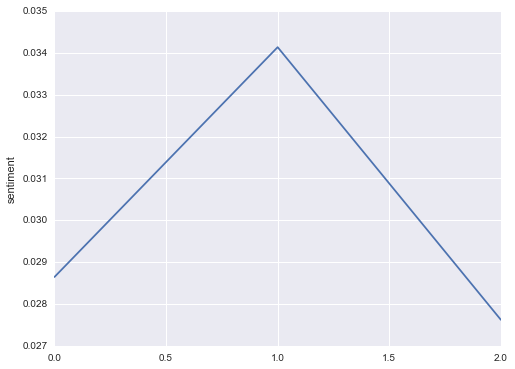

In [67]:
plt.plot(three_piece_char)
plt.ylabel('sentiment')
plt.show()

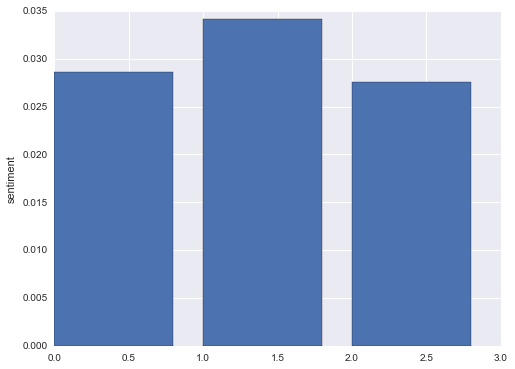

In [68]:
plt.bar(range(3), three_piece_char)
plt.ylabel('sentiment')
plt.show()

In [69]:
df_cluster.head()

,0,total_char,syl_sum,sentiment,cluster
0,He held the bowl aloft and intoned: --_Introi...,47,16,0.000000,0
1,"Halted, he peered down the dark winding stairs...",69,18,-0.101852,0
2,"Come up, you fearful jesuit!",22,8,-1.000000,0
3,Solemnly he came forward and mounted the round...,46,13,-0.200000,0
4,He faced about and blessed gravely thrice the ...,83,25,0.000000,0


In [70]:
df_cluster5 = df_cluster

In [72]:
df_cluster5.head()

,0,total_char,syl_sum,sentiment,cluster
0,He held the bowl aloft and intoned: --_Introi...,47,16,0.000000,0
1,"Halted, he peered down the dark winding stairs...",69,18,-0.101852,0
2,"Come up, you fearful jesuit!",22,8,-1.000000,0
3,Solemnly he came forward and mounted the round...,46,13,-0.200000,0
4,He faced about and blessed gravely thrice the ...,83,25,0.000000,0


In [74]:
X = df_cluster5.drop(0, axis=1)

In [75]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [76]:
km = KMeans(n_clusters=5, random_state=1)
km.fit(X_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)

In [77]:
df_cluster5['cluster'] = km.labels_

In [78]:
df_cluster5.groupby('cluster').mean()

,total_char,syl_sum,sentiment
cluster,,,
0,45.152208,14.112069,0.000286
1,47246.000000,15078.000000,0.045667
2,76.661079,24.156627,0.366881
3,52.921289,16.468516,-0.444046
4,42.045340,13.018892,0.724635
